In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numba
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

from typing import Dict

from saturation.simulation import *
from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *

In [2]:
def aggregate_simulations(stats: pd.DataFrame, expected_count: int):
    columns_to_aggregate = [
        'n_craters_in_observed_area',
        'areal_density',
        'z',
        'za'
    ]
    aggregations = {
        x: [
            'min',
            pd.NamedAgg(column=x, aggfunc=percentile(25)),
            'mean',
            pd.NamedAgg(column=x, aggfunc=percentile(75)),
            'max'
        ]
        for x in columns_to_aggregate
    }
    col_names = [
        [
            f'{x}_min',
            f'{x}_25_percentile',
            f'{x}_mean',
            f'{x}_75_percentile',
            f'{x}_max'
        ]
        for x in columns_to_aggregate
    ]
    col_names = [y for x in col_names for y in x]

    grouped = stats.groupby(['n_craters_added_in_observed_area']).agg(
        aggregations
    )

    grouped.columns = col_names
    grouped['group_count'] = stats.groupby(['n_craters_added_in_observed_area']).n_craters_in_observed_area.agg('count')
    
    # Make sure all samples have full data
    grouped = grouped[grouped.group_count == expected_count]
    
    
    grouped.reset_index(inplace=True)
    
    return grouped


def plot_statistics(stats: pd.DataFrame):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Plot crater count
    ax = axes[0][0]
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_min, label='Min')
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_25_percentile, label='25th')
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_mean, label='Mean')
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_75_percentile, label='75th')
    ax.plot(stats.n_craters_added_in_observed_area, stats.n_craters_in_observed_area_max, label='Max')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Observable Craters')
    ax.legend(loc='upper left')

    # Plot crater count
    ax = axes[0][1]
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_min, label='Min')
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_25_percentile, label='25th')
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_mean, label='Mean')
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_75_percentile, label='75th')
    ax.plot(stats.n_craters_added_in_observed_area, stats.areal_density_max, label='Max')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Areal Density')

    # Plot Z statistic
    ax = axes[1][0]
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_min, label='Min')
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_25_percentile, label='25th')
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_mean, label='Mean')
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_75_percentile, label='75th')
    ax.plot(stats.n_craters_added_in_observed_area, stats.z_max, label='Max')
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Z Statistic')

    # Plot Za statistic
    ax = axes[1][1]
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_min, label='Min')
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_25_percentile, label='25th')
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_mean, label='Mean')
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_75_percentile, label='75th')
    ax.plot(stats.n_craters_added_in_observed_area, stats.za_max, label='Max')
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Za Statistic')

    plt.show()


In [ ]:
def percentile(n):
    @numba.jit(forceobj=True, fastmath=True)
    def _percentile(x):
        return np.percentile(x, n)
    return _percentile

In [123]:
base_path = '/home/mason/output/'
filenames = [
    f'{base_path}/{stem}/{x}/statistics.csv'
    for x in range(1, 56)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename)
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

python_stats = aggregate_simulations(stats, len(sim_stats))
python_stats.tail()

,n_craters_added_in_observed_area,n_craters_in_observed_area_min,n_craters_in_observed_area_25_percentile,n_craters_in_observed_area_mean,n_craters_in_observed_area_75_percentile,n_craters_in_observed_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max,group_count
4993,4996,456,617.5,807.436364,963.5,1298,0.168859,0.265504,0.298170,0.333007,...,-5.907871,-4.905554,-3.455937,-1.159536,-7.757707,2.749972,4.803169,7.592972,15.025580,55
4994,4997,457,618.5,808.345455,964.5,1299,0.168859,0.265508,0.298222,0.333016,...,-5.843924,-4.891641,-3.446871,-1.108772,-7.840115,2.728811,4.829309,7.656632,14.984046,55
4995,4998,458,619.5,809.163636,965.0,1300,0.168861,0.265784,0.298237,0.333018,...,-5.896306,-4.874645,-3.496083,-1.096489,-7.881296,2.762094,4.856057,7.673526,15.073124,55
4996,4999,459,620.5,810.090909,966.0,1301,0.168909,0.265786,0.298277,0.333024,...,-5.862868,-4.853158,-3.566385,-1.089826,-7.865182,2.774885,4.889669,7.721363,15.133267,55
4997,5000,460,621.5,810.890909,967.0,1302,0.168924,0.265970,0.298405,0.333066,...,-5.877285,-4.832499,-3.540940,-1.051242,-7.585394,2.820918,4.924073,7.836865,15.253325,55


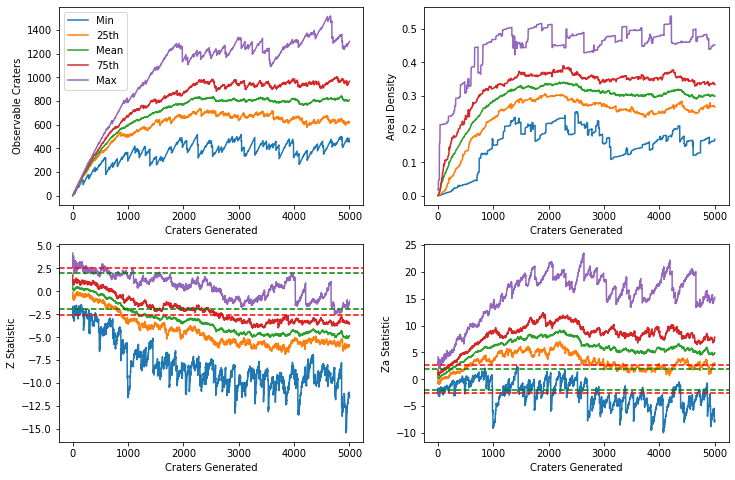

In [124]:
plot_statistics(python_stats)

In [15]:
python_stats.to_csv(f'/home/mason/output/python_mean_curves_{stem}.csv', index=False)

In [125]:
base_path = '/home/mason/code/kirchoff_saturation/full_runs/'
filenames = [
    f'{base_path}/{stem}/run_-1.00_1.50_0.40_3.00_{x}_1.csv'
    for x in range(1, 56)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_added_in_observed_area', 'n_craters_in_observed_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

idl_stats = aggregate_simulations(stats, len(sim_stats))
idl_stats.tail()

,n_craters_added_in_observed_area,n_craters_in_observed_area_min,n_craters_in_observed_area_25_percentile,n_craters_in_observed_area_mean,n_craters_in_observed_area_75_percentile,n_craters_in_observed_area_max,areal_density_min,areal_density_25_percentile,areal_density_mean,areal_density_75_percentile,...,z_25_percentile,z_mean,z_75_percentile,z_max,za_min,za_25_percentile,za_mean,za_75_percentile,za_max,group_count
4978,4995,445,700.0,824.981818,962.0,1263,0.158548,0.252681,0.294195,0.345893,...,-5.585,-4.324000,-3.075,-0.62,-6.16,3.185,5.572000,8.865,15.53,55
4979,4996,446,701.0,825.309091,963.0,1264,0.158551,0.252390,0.294309,0.346199,...,-5.625,-4.315091,-3.095,-0.61,-6.14,3.205,5.591636,8.910,15.68,55
4980,4997,447,696.0,824.890909,963.5,1265,0.158610,0.252391,0.295009,0.346200,...,-5.620,-4.343455,-3.120,-0.57,-6.03,3.155,5.579636,8.915,15.88,55
4981,4998,407,697.0,822.181818,964.5,1266,0.173722,0.252608,0.294963,0.346201,...,-5.700,-4.431091,-3.105,-0.53,-5.77,2.945,5.455273,8.980,15.80,55
4982,4999,408,698.0,822.981818,965.5,1267,0.173722,0.252633,0.295096,0.346202,...,-5.760,-4.433091,-3.110,-0.51,-5.70,2.885,5.463455,9.055,15.78,55


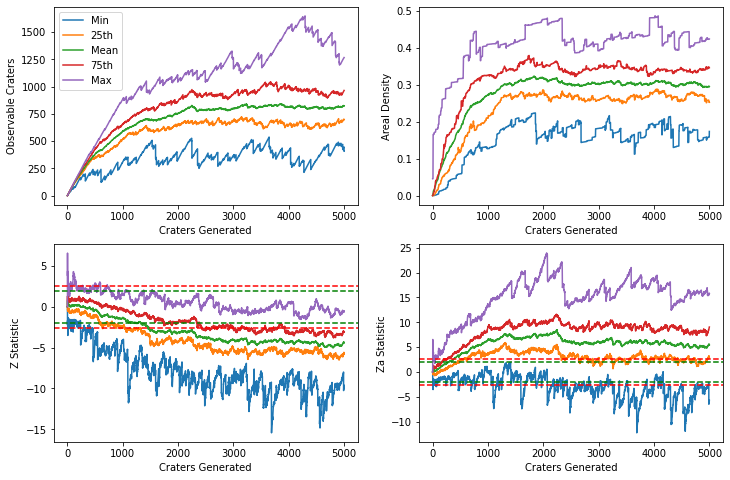

In [126]:
plot_statistics(idl_stats)

In [18]:
idl_stats.to_csv('/home/mason/output/idl_mean_curves_2.00_5.00_0.60_1.10.csv', index=False)

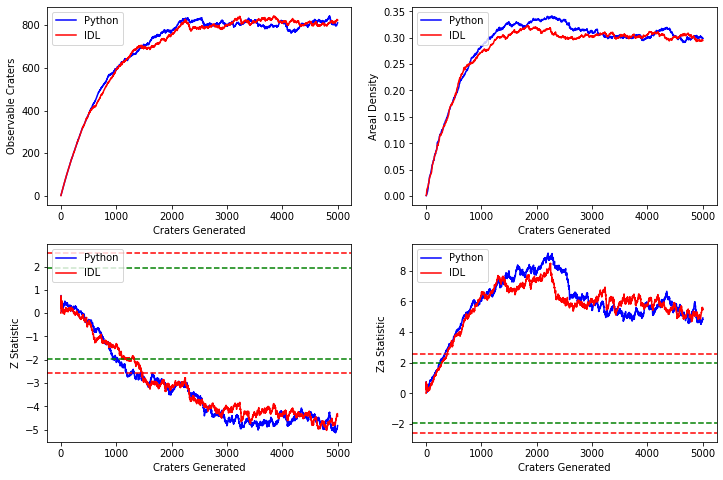

In [127]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot crater count
ax = axes[0][0]
ax.plot(python_stats.n_craters_added_in_observed_area, python_stats.n_craters_in_observed_area_mean, color='b', label='Python')
ax.plot(idl_stats.n_craters_added_in_observed_area, idl_stats.n_craters_in_observed_area_mean, color='r', label='IDL')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Observable Craters')
ax.legend(loc='upper left')

# Plot crater count
ax = axes[0][1]
ax.plot(python_stats.n_craters_added_in_observed_area, python_stats.areal_density_mean, color='b', label='Python')
ax.plot(idl_stats.n_craters_added_in_observed_area, idl_stats.areal_density_mean, color='r', label='IDL')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Areal Density')
ax.legend(loc='upper left')

# Plot Z statistic
ax = axes[1][0]
ax.plot(python_stats.n_craters_added_in_observed_area, python_stats.z_mean, color='b', label='Python')
ax.plot(idl_stats.n_craters_added_in_observed_area, idl_stats.z_mean, color='r', label='IDL')
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Z Statistic')
ax.legend(loc='upper left')

# Plot Za statistic
ax = axes[1][1]
ax.plot(python_stats.n_craters_added_in_observed_area, python_stats.za_mean, color='b', label='Python')
ax.plot(idl_stats.n_craters_added_in_observed_area, idl_stats.za_mean, color='r', label='IDL')
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Za Statistic')
ax.legend(loc='upper left')

plt.show()

### Comparing Curves

In [155]:
stem = '1.00_3.00_0.40_1.50'
python_base_path = f'/home/mason/output/'
idl_base_path = f'/home/mason/code/kirchoff_saturation/full_runs/'

In [156]:
first_choices = np.random.choice(range(1, 55), 27, replace=False)
second_choices = [x for x in range(1, 55) if x not in first_choices]

In [192]:
def read_idl_stats(sim_number: int,
                   base_path: str,
                   slope: float,
                   r_stat_multiplier: float,
                   min_rim_percentage: float,
                   effective_radius_multiplier: float) -> pd.DataFrame:
    filename = f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/run_-{slope:.2f}_{effective_radius_multiplier:.2f}_{min_rim_percentage:.2f}_{r_stat_multiplier:.2f}_{sim_number}_1.csv'
    
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_added_in_observed_area', 'n_craters_in_observed_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2

    return stats

In [195]:
def read_python_stats(sim_number: int,
                      base_path: str,
                      slope: float,
                      r_stat_multiplier: float,
                      min_rim_percentage: float,
                      effective_radius_multiplier: float) -> pd.DataFrame:
    filename = f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/{sim_number}/statistics.csv'
    
    stats = pd.read_csv(filename)
    stats.columns = ['crater_id', 'n_craters_added_in_observed_area', 'n_craters_in_observed_area', 'areal_density', 'z', 'za']

    return stats

In [174]:
def get_all_significances(stats1: List[pd.DataFrame],
                          stats2: List[pd.DataFrame],
                          metric: str) -> List[Tuple[float, float]]:
    results = []
    
    for s1 in stats1:
        for s2 in stats2:
            ks_sig = scipy.stats.kstest(s1[metric], s2[metric]).pvalue
            ad_sig = scipy.stats.anderson_ksamp([s1[metric], s2[metric]]).significance_level
            
            results.append((ks_sig, ad_sig))
    
    return results

In [203]:
def get_boostrapped_mean_ci(samples: np.array, n_resamples: int = 5000) -> Tuple[float, float]:
    """
    Boostrap a 95% CI on the mean KS p-value
    Using BCa - bias-accelerated boostrap confidence interval
    """
    samples = np.expand_dims(samples, axis=0)
    result = scipy.stats.bootstrap(samples,
                                   np.mean,
                                   confidence_level=0.95,
                                   method='BCa',
                                   n_resamples=n_resamples)
    return result.confidence_interval.low, result.confidence_interval.high

In [175]:
idl_stats1 = [
    read_idl_stats(x,
                   idl_base_path,
                   1,
                   3,
                   0.4,
                   1.5)
    for x in first_choices
]

idl_stats2 = [
    read_idl_stats(x,
                   idl_base_path,
                   1,
                   3,
                   0.4,
                   1.5)
    for x in second_choices
]

In [188]:
metrics = ['n_craters_in_observed_area', 'areal_density', 'z', 'za']
for metric in metrics:
    significances = get_all_significances(idl_stats2, idl_stats2, metric)
    ks_mean_ci = get_boostrapped_mean_ci([x[0] for x in significances])
    ad_mean_ci = get_boostrapped_mean_ci([x[1] for x in significances])
    
    print(f'{metric} 95% CI on the mean:')
    print(f'  KS: {ks_mean_ci}')
    print(f'  AD: {ad_mean_ci}')

n_craters_in_observed_area 95% CI on the mean:
  KS: (0.024691549923761272, 0.0534979903677629)
  AD: (0.006806584362139919, 0.013637860082304528)
areal_density 95% CI on the mean:
  KS: (0.023319615912208526, 0.050754458161865586)
  AD: (0.006806584362139919, 0.01363786008230453)
z 95% CI on the mean:
  KS: (0.024692464389544973, 0.05349859642204305)
  AD: (0.00680658436213992, 0.013637860082304528)
za 95% CI on the mean:
  KS: (0.02469457777294474, 0.05349842914106401)
  AD: (0.007148148148148148, 0.013637860082304528)


In [189]:
# Comparing all IDL sims to all Python sims

In [196]:
n_sims = 55

idl_stats = [
    read_idl_stats(x,
                   idl_base_path,
                   1,
                   3,
                   0.4,
                   1.5)
    for x in range(1, n_sims+1)
]

python_stats = [
    read_python_stats(x,
                      python_base_path,
                      1,
                      3,
                      0.4,
                      1.5)
    for x in range(1, n_sims+1)
]

In [197]:
metrics = ['n_craters_in_observed_area', 'areal_density', 'z', 'za']
for metric in metrics:
    significances = get_all_significances(idl_stats, python_stats, metric)
    ks_mean_ci = get_boostrapped_mean_ci([x[0] for x in significances])
    ad_mean_ci = get_boostrapped_mean_ci([x[1] for x in significances])
    
    print(f'{metric} 95% CI on the mean:')
    print(f'  KS: {ks_mean_ci}')
    print(f'  AD: {ad_mean_ci}')

n_craters_in_observed_area 95% CI on the mean:
  KS: (1.3642413924609182e-07, 2.7188364950418926e-06)
  AD: (0.0010000000000000002, 0.0010182560635121091)
areal_density 95% CI on the mean:
  KS: (3.1343254180878097e-14, 6.013435451664641e-11)
  AD: (nan, nan)
z 95% CI on the mean:
  KS: (1.7879637396537251e-06, 1.251915601827414e-05)
  AD: (0.001000341942027947, 0.0010194790050431658)
za 95% CI on the mean:
  KS: (8.221686080127988e-09, 7.618498486765141e-08)
  AD: (nan, nan)


### Comparing SFDs

In [198]:
stem = '1.00_3.00_0.40_1.50'
python_base_path = f'/home/mason/output/'
idl_base_path = f'/home/mason/code/kirchoff_saturation/full_runs/'

In [199]:
def read_idl_radii(sim_number: int,
                   base_path: str,
                   slope: float,
                   r_stat_multiplier: float,
                   min_rim_percentage: float,
                   effective_radius_multiplier: float) -> pd.DataFrame:
    filename = f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/run_-{slope:.2f}_{effective_radius_multiplier:.2f}_{min_rim_percentage:.2f}_{r_stat_multiplier:.2f}_{sim_number}_3.csv'
    
    data = pd.read_csv(filename, skiprows=3, header=None)
    data.columns = ['x', 'y', 'radius', 'order_removed']
    radii = data[data.order_removed == 0].radius

    return radii

In [200]:
def read_python_radii(sim_number: int,
                      base_path: str,
                      slope: float,
                      r_stat_multiplier: float,
                      min_rim_percentage: float,
                      effective_radius_multiplier: float,
                      step_number: int = 5000) -> pd.DataFrame:
    filename = f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/{sim_number}/state.parquet'
    
    data = pd.read_parquet(filename)
    radii = data[data.n_craters_added_in_observed_area == step_number].radius

    return radii

In [202]:
n_sims = 55

idl_radii = [
    read_idl_radii(x,
                   idl_base_path,
                   1,
                   3,
                   0.4,
                   1.5)
    for x in range(1, n_sims+1)
]
idl_radii = [pd.DataFrame(x, columns=['radius']) for x in idl_radii]

python_radii = [
    read_python_radii(x,
                      python_base_path,
                      1,
                      3,
                      0.4,
                      1.5)
    for x in range(1, n_sims+1)
]
python_radii = [pd.DataFrame(x, columns=['radius']) for x in python_radii]

In [207]:
significances = get_all_significances(idl_radii, python_radii, 'radius')
ks_mean_ci = get_boostrapped_mean_ci([x[0] for x in significances], n_resamples=10000)
ad_mean_ci = get_boostrapped_mean_ci([x[1] for x in significances], n_resamples=10000)

print(f'Radius 95% CI on the mean:')
print(f'  KS: {ks_mean_ci}')
print(f'  AD: {ad_mean_ci}')

Radius 95% CI on the mean:
  KS: (0.45675434855432967, 0.4782326290443874)
  AD: (0.20384887254630776, 0.2092976467111875)


### Plotting SFDs

In [120]:
def plot_sfds(state: pd.DataFrame, times: List[int]):
    # Track min and max radii
    min_radius = 1e10
    max_radius = 0
    
    for time in times:
        state_at_time = state[state.n_craters_added_in_observed_area == time]
        radii = state_at_time.radius.sort_values()
        
        min_r = radii.head(1).squeeze()
        max_r = radii.tail(1).squeeze()
        if min_r < min_radius:
            min_radius = min_r
        if max_r > max_radius:
            max_radius = max_r
        
        plt.plot(radii, range(len(radii) + 1, 1, -1), label=time)
        
    # Plot geometric saturation lines
    saturation_range = np.array(range(int(min_radius), int(max_radius)))
    saturation_vals = np.array([10000**2 / (np.pi * x**2) for x in saturation_range])
    plt.plot(saturation_range, saturation_vals/10, 'b--', label="10% Sat")
    plt.plot(saturation_range, saturation_vals/100, 'r--', label="1% Sat")
    
    # Plot production lines
    production_vals = np.array([x**-2.8 for x in saturation_range])
    plt.plot(saturation_range, production_vals * 1e6, 'g--', label="Prod 1e6")
    plt.plot(saturation_range, production_vals * 1e7, 'g--', label="Prod 1e7")
    plt.plot(saturation_range, production_vals * 1e8, 'g--', label="Prod 1e8")
    
    plt.subplots_adjust(right=0.7)
    plt.tight_layout(rect=[0, 0, 0.75, 1])
    
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.xscale('log')
    plt.yscale('log')

In [127]:
base_path = '/home/mason/output/'
n_craters = [250, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 9750]
states = []
for n in n_craters:
    state = pd.read_csv(f'{base_path}/2.80_9.00_0.60_1.90/1/state_{n}.csv')
    states.append(state)

state = pd.concat(states, axis=0)

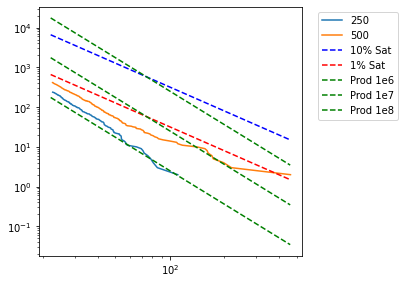

In [317]:
plot_sfds(state, n_craters[0:2])

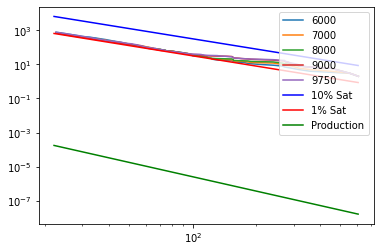

In [97]:
plot_sfds(state, n_craters[7:13])

In [45]:
state[state.n_craters_added_in_observed_area == 5000]

,last_crater_id,n_craters_added_in_observed_area,crater_id,x,y,radius,erased_rim_segments,rim_percent_remaining
11444527,71280,5000,46,6868.710264,10563.913945,23.321456,[],1.000000
11444528,71280,5000,60,9713.787493,6284.734406,12.020709,[],1.000000
11444529,71280,5000,70,8469.810503,10529.163076,9.200157,"[[0.0, 0.783687911539397], [5.773547760266944,...",0.794161
11444530,71280,5000,97,4415.173647,2059.732790,7.648633,[],1.000000
11444531,71280,5000,128,2753.623583,4092.427296,13.243627,"[[1.8204132245710394, 3.5986659106382755]]",0.716982
...,...,...,...,...,...,...,...,...
11448815,71280,5000,71211,6071.541850,5658.322071,24.085749,[],1.000000
11448816,71280,5000,71222,8540.577290,7264.554452,8.426497,[],1.000000
11448817,71280,5000,71230,4011.260884,9964.049251,15.813943,[],1.000000
11448818,71280,5000,71241,8381.080446,7478.329478,14.050745,[],1.000000


### Determining Equilibrium

### Smoothing and Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.nonparametric as smn

In [219]:
def read_statistics(sim_number: int,
                    base_path: str,
                    slope: float,
                    r_stat_multiplier: float,
                    min_rim_percentage: float,
                    effective_radius_multiplier: float) -> pd.DataFrame:
    filename = f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/{sim_number}/statistics.csv'
    
    data = pd.read_csv(filename)

    return data

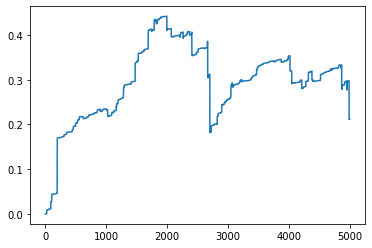

In [270]:
data = read_statistics(3,
                       python_base_path,
                       1,
                       3,
                       0.4,
                       1.5)

plt.plot(data.n_craters_added_in_observed_area, data.areal_density)

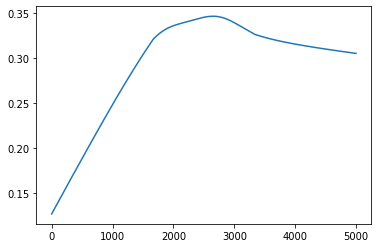

In [271]:
Y = data.areal_density
X = data.n_craters_added_in_observed_area

smoothed = smn.smoothers_lowess.lowess(Y, X, return_sorted=False)
plt.plot(subset.index, smoothed)

In [283]:
X = sm.add_constant(X)
model = sm.OLS(Y[-500:], X[-500:])
results = model.fit()
results.pvalues

const                               3.910519e-72
n_craters_added_in_observed_area    1.734827e-20
dtype: float64

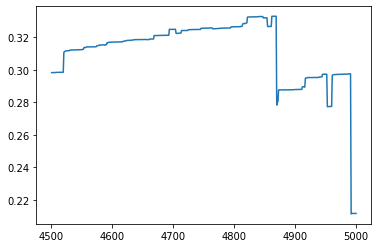

In [316]:
plt.plot(X[-500:].n_craters_added_in_observed_area, Y[-500:])

In [284]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          areal_density   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     94.06
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.73e-20
Time:                        09:41:22   Log-Likelihood:                 1294.6
No. Observations:                 500   AIC:                            -2585.
Df Residuals:                     498   BIC:                            -2577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.5714      0.027     21.318      0.000       0.519       0.624
n_craters_added_in_observed_area  -5.47e-05   5.64e-06     -9.698      0.000   -6.58e-05   -4.36e-05
==============================================================================
Omnibus:                      216.938   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1321.630
Skew:                          -1.797   Prob(JB):                    1.03e-287
Kurtosis:                      10.108   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [285]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

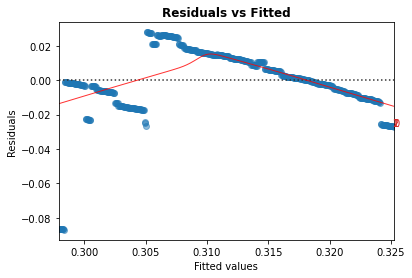

In [286]:
cls = Linear_Reg_Diagnostic(results)
cls.residual_plot()

<AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

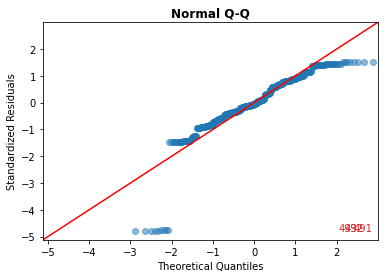

In [287]:
cls.qq_plot()

### Rolling mean and variance

In [288]:
s = np.flip(data.areal_density)

In [300]:
rolling_data = data.copy()
rolling_data[['rolling_mean', 'rolling_std']] = s.rolling(300).agg(['mean', 'std'])

In [301]:
rolling_data

,crater_id,n_craters_added_in_observed_area,n_craters_in_observed_area,areal_density,z,za,rolling_mean,rolling_std
0,2,1,1,0.000018,NaN,NaN,0.076450,0.070613
1,5,2,2,0.000020,3.319103,3.319163,0.077029,0.070695
2,10,3,3,0.000067,3.687092,3.687327,0.077607,0.070773
3,19,4,4,0.000069,1.667831,1.668021,0.078185,0.070846
4,20,5,5,0.000071,1.339079,1.339280,0.078764,0.070914
...,...,...,...,...,...,...,...,...
4995,22874,4996,456,0.211539,-11.465820,-7.757707,NaN,NaN
4996,22880,4997,457,0.211551,-11.544229,-7.840115,NaN,NaN
4997,22885,4998,458,0.211553,-11.585848,-7.881296,NaN,NaN
4998,22893,4999,459,0.211562,-11.576702,-7.865182,NaN,NaN


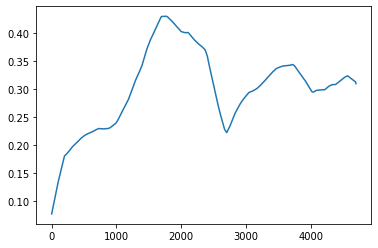

In [302]:
plt.plot(rolling_data.n_craters_added_in_observed_area, rolling_data.rolling_mean)

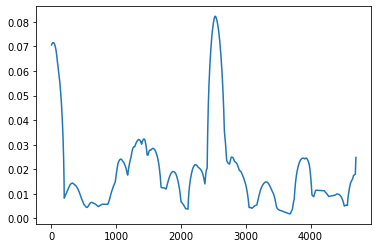

In [303]:
plt.plot(rolling_data.n_craters_added_in_observed_area, rolling_data.rolling_std)

In [312]:
rolling_data['rolling_z'] = (rolling_data.areal_density - rolling_data.rolling_mean) / rolling_data.rolling_std

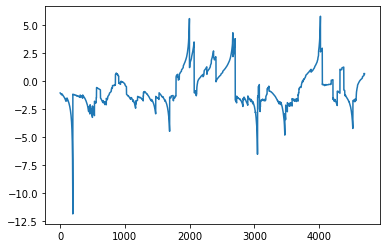

In [313]:
plt.plot(rolling_data.n_craters_added_in_observed_area, rolling_data.rolling_z)